In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv('./placedata v2.0 synthetic.csv')
df.head()

In [215]:
df.shape

(10000, 12)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [79]:
df.describe(include='all')

StudentID          CGPA   Internships      Projects  \
count   10000.00000  10000.000000  10000.000000  10000.000000   
unique          NaN           NaN           NaN           NaN   
top             NaN           NaN           NaN           NaN   
freq            NaN           NaN           NaN           NaN   
mean     5000.50000      7.698010      1.049200      2.026600   
std      2886.89568      0.640131      0.665901      0.867968   
min         1.00000      6.500000      0.000000      0.000000   
25%      2500.75000      7.400000      1.000000      1.000000   
50%      5000.50000      7.700000      1.000000      2.000000   
75%      7500.25000      8.200000      1.000000      3.000000   
max     10000.00000      9.100000      2.000000      3.000000   

        Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
count               10000.000000       10000.000000      10000.000000   
unique                       NaN                NaN               NaN   
top                          NaN                NaN               NaN   
freq                         NaN                NaN               NaN   
mean                    1.013200          79.449900          4.323960   
std                     0.904272           8.159997          0.411622   
min                     0.000000          60.000000          3.000000   
25%                     0.000000          73.000000          4.000000   
50%                     1.000000          80.000000          4.400000   
75%                     2.000000          87.000000          4.700000   
max                     3.000000          90.000000          4.800000   

       ExtracurricularActivities PlacementTraining     SSC_Marks  \
count                      10000             10000  10000.000000   
unique                         2                 2           NaN   
top                          Yes               Yes           NaN   
freq                        5854              7318           NaN   
mean                         NaN               NaN     69.159400   
std                          NaN               NaN     10.430459   
min                          NaN               NaN     55.000000   
25%                          NaN               NaN     59.000000   
50%                          NaN               NaN     70.000000   
75%                          NaN               NaN     78.000000   
max                          NaN               NaN     90.000000   

           HSC_Marks PlacementStatus  
count   10000.000000           10000  
unique           NaN               2  
top              NaN       NotPlaced  
freq             NaN            5803  
mean       74.501500             NaN  
std         8.919527             NaN  
min        57.000000             NaN  
25%        67.000000             NaN  
50%        73.000000             NaN  
75%        83.000000             NaN  
max        88.000000             NaN

In [80]:
num_columns = ['CGPA', 'SoftSkillsRating', 'AptitudeTestScore', 'SSC_Marks', 'HSC_Marks']
cat_columns = ['Internships', 'Projects', 'Workshops/Certifications', 'ExtracurricularActivities','PlacementTraining']

In [81]:
for i in cat_columns:
  print(i,":->",df[i].unique())
  

Internships :-> [1 0 2]
Projects :-> [1 3 2 0]
Workshops/Certifications :-> [1 2 0 3]
ExtracurricularActivities :-> ['No' 'Yes']
PlacementTraining :-> ['No' 'Yes']


## EDA

### Uni-variate Analysis

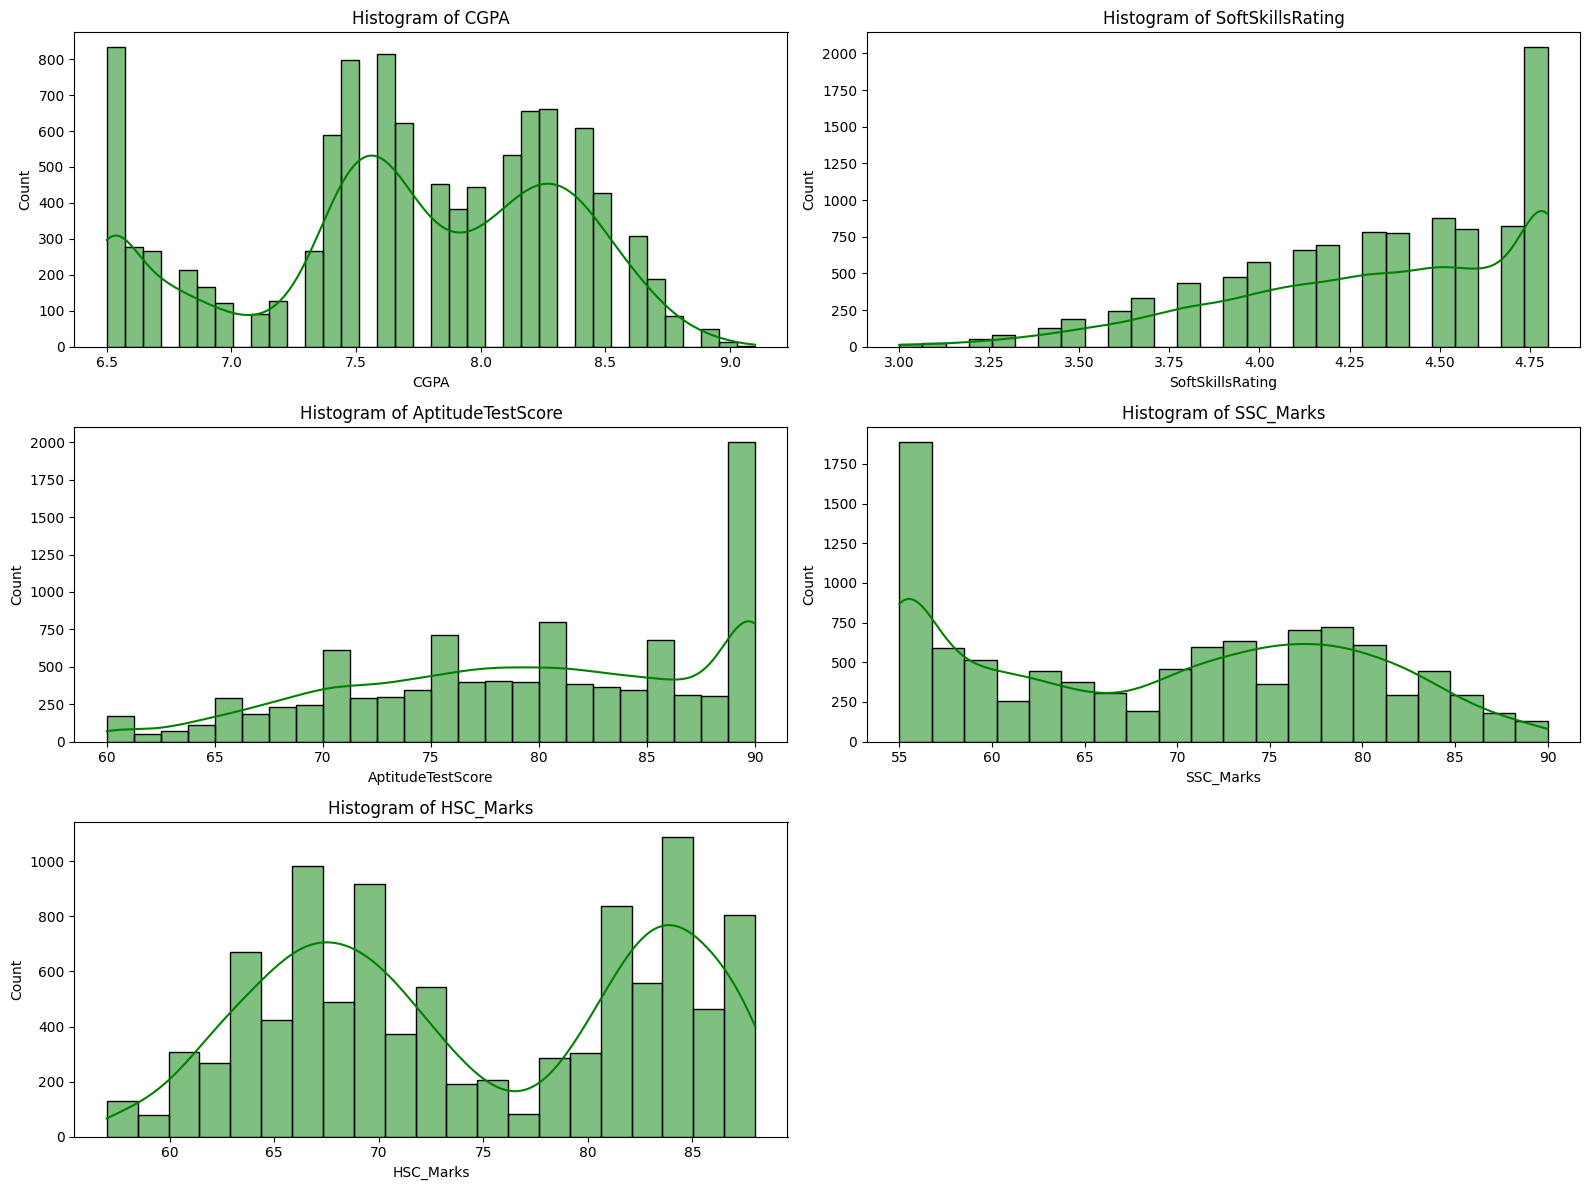

In [39]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(2):
        sns.histplot(x=df[num_columns[index]], data=df, ax=axis[row, col], kde=True, color='green', edgecolor='black')
        axis[row, col].set_title(f'Histogram of {num_columns[index]}')
        index += 1

# Remove the plot in the 2nd row, 1st column
fig.delaxes(axis[2, 1])

# Plot for 'HSC_Marks'
sns.histplot(x=df['HSC_Marks'], data=df, ax=axis[2, 0], kde=True, color='green', edgecolor='black')
axis[2, 0].set_title('Histogram of HSC_Marks')

plt.tight_layout()
plt.show()


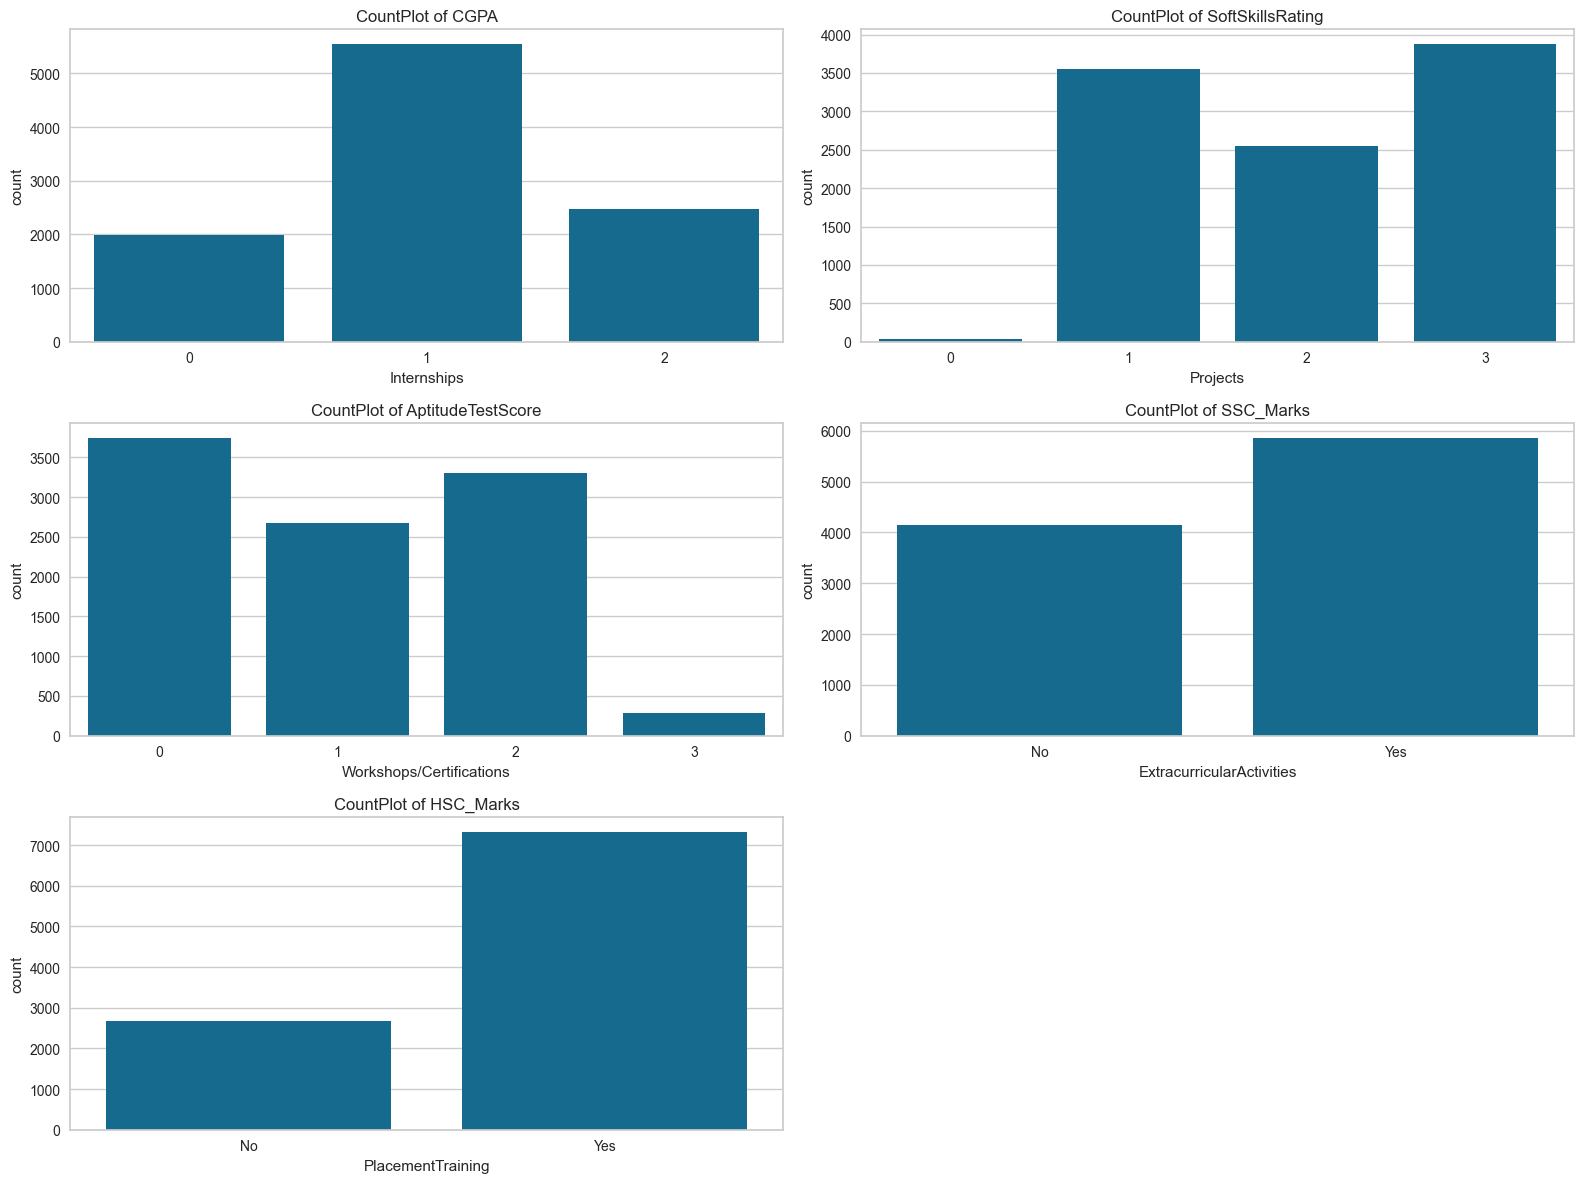

In [216]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(x=df[cat_columns[index]], data=df, ax=axis[row, col])
        axis[row, col].set_title(f'CountPlot of {num_columns[index]}')
        index += 1

# Remove the plot in the 2nd row, 1st column
fig.delaxes(axis[2, 1])

# Plot for 'HSC_Marks'
sns.countplot(x=df['PlacementTraining'], data=df, ax=axis[2, 0])
axis[2, 0].set_title('CountPlot of HSC_Marks')

plt.tight_layout()
plt.show()


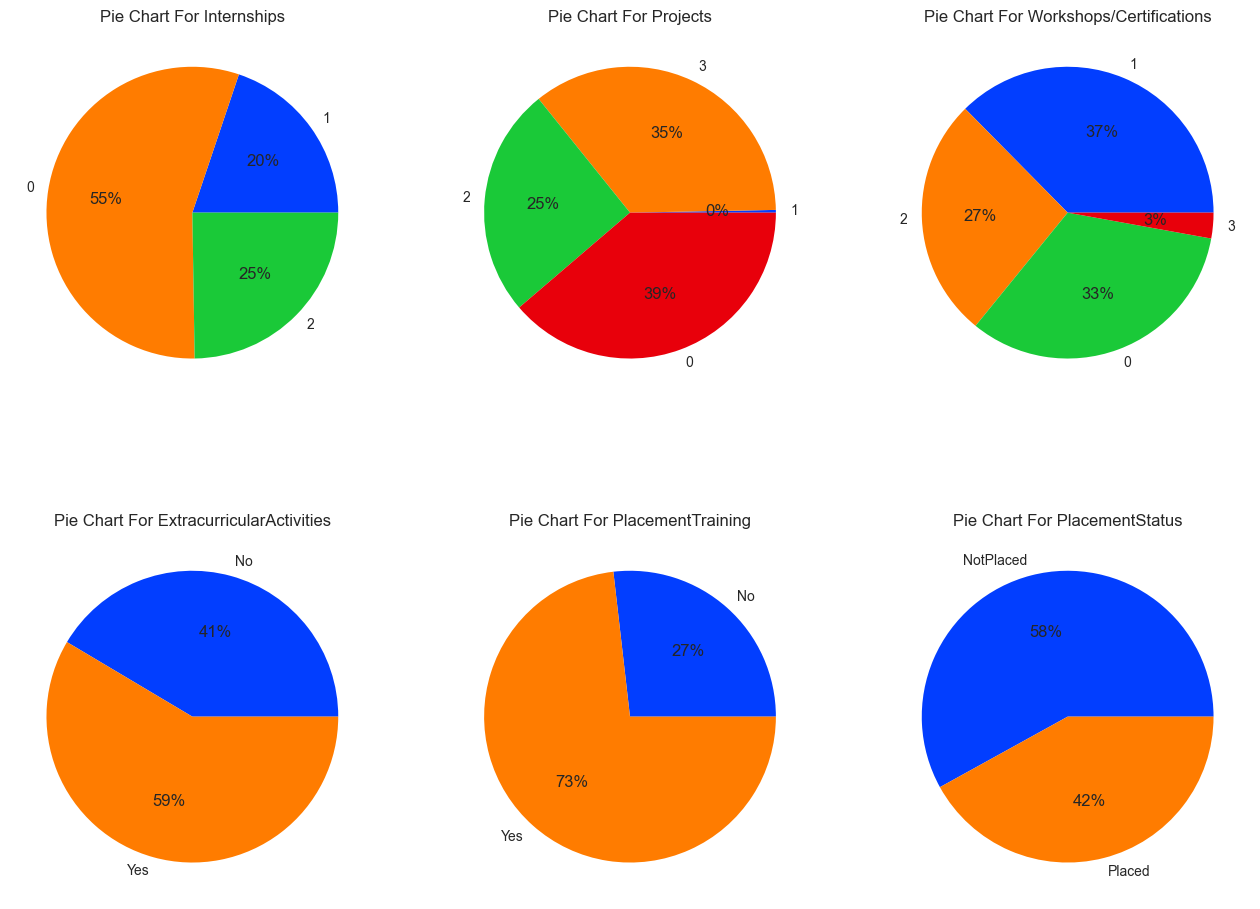

<Figure size 800x550 with 0 Axes>

In [217]:
# Set the background color of the plot

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

# Define categorical columns
cat_columns = ['Internships', 'Projects', 'Workshops/Certifications', 'ExtracurricularActivities', 'PlacementTraining','PlacementStatus']

labels = []
# Loop through each categorical column
for column in cat_columns:
    # Get unique labels for the column
    colLabels = df[column].unique().tolist()
    # Store column name and labels in the dictionary
    labels.append(colLabels)

# Define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
index = 0
for row in range(2):
    for col in range(3):
        df.groupby(cat_columns[index]).size().plot(kind='pie', labels=labels[index],
        autopct='%.0f%%',colors=palette_color,ax=axis[row,col])
        axis[row, col].set_title(f'Pie Chart For {cat_columns[index]}')
        index+=1

# Display the chart
plt.figure(facecolor='lightgray')
plt.show()


### Bi-variate Analysis

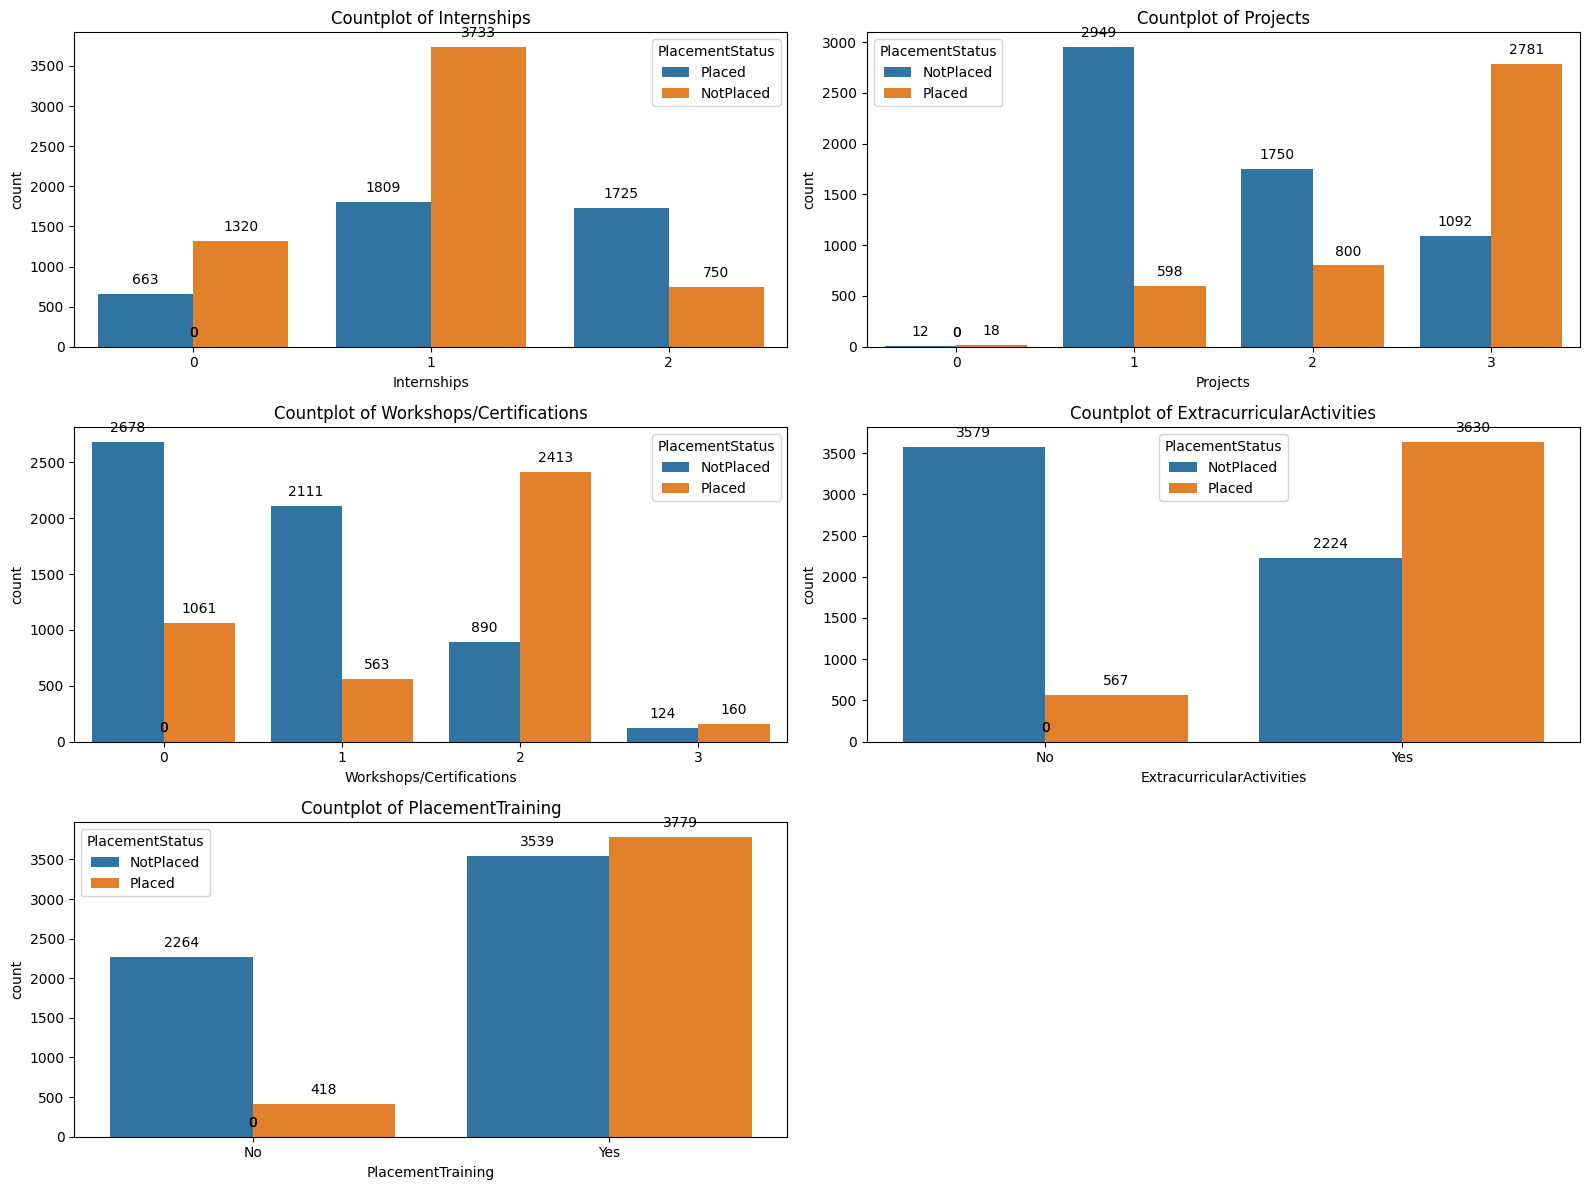

In [83]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(x=df[cat_columns[index]], data=df, hue=df["PlacementStatus"], ax=axis[row, col])
        axis[row, col].set_title(f'Countplot of {cat_columns[index]}')

        # Add count numbers on top of bars
        for p in axis[row, col].patches:
            axis[row, col].annotate(format(p.get_height(), '.0f'),
                                     (p.get_x() + p.get_width() / 2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10),
                                     textcoords='offset points')

        index += 1

# Remove the plot in the 2nd row, 1st column
fig.delaxes(axis[2, 1])

# Plot for 'PlacementTraining'
sns.countplot(x=df['PlacementTraining'], data=df, hue=df["PlacementStatus"], ax=axis[2, 0])
axis[2, 0].set_title('Countplot of PlacementTraining')

# Add count numbers on top of bars
for p in axis[2, 0].patches:
    axis[2, 0].annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10),
                         textcoords='offset points')

plt.tight_layout()
plt.show()


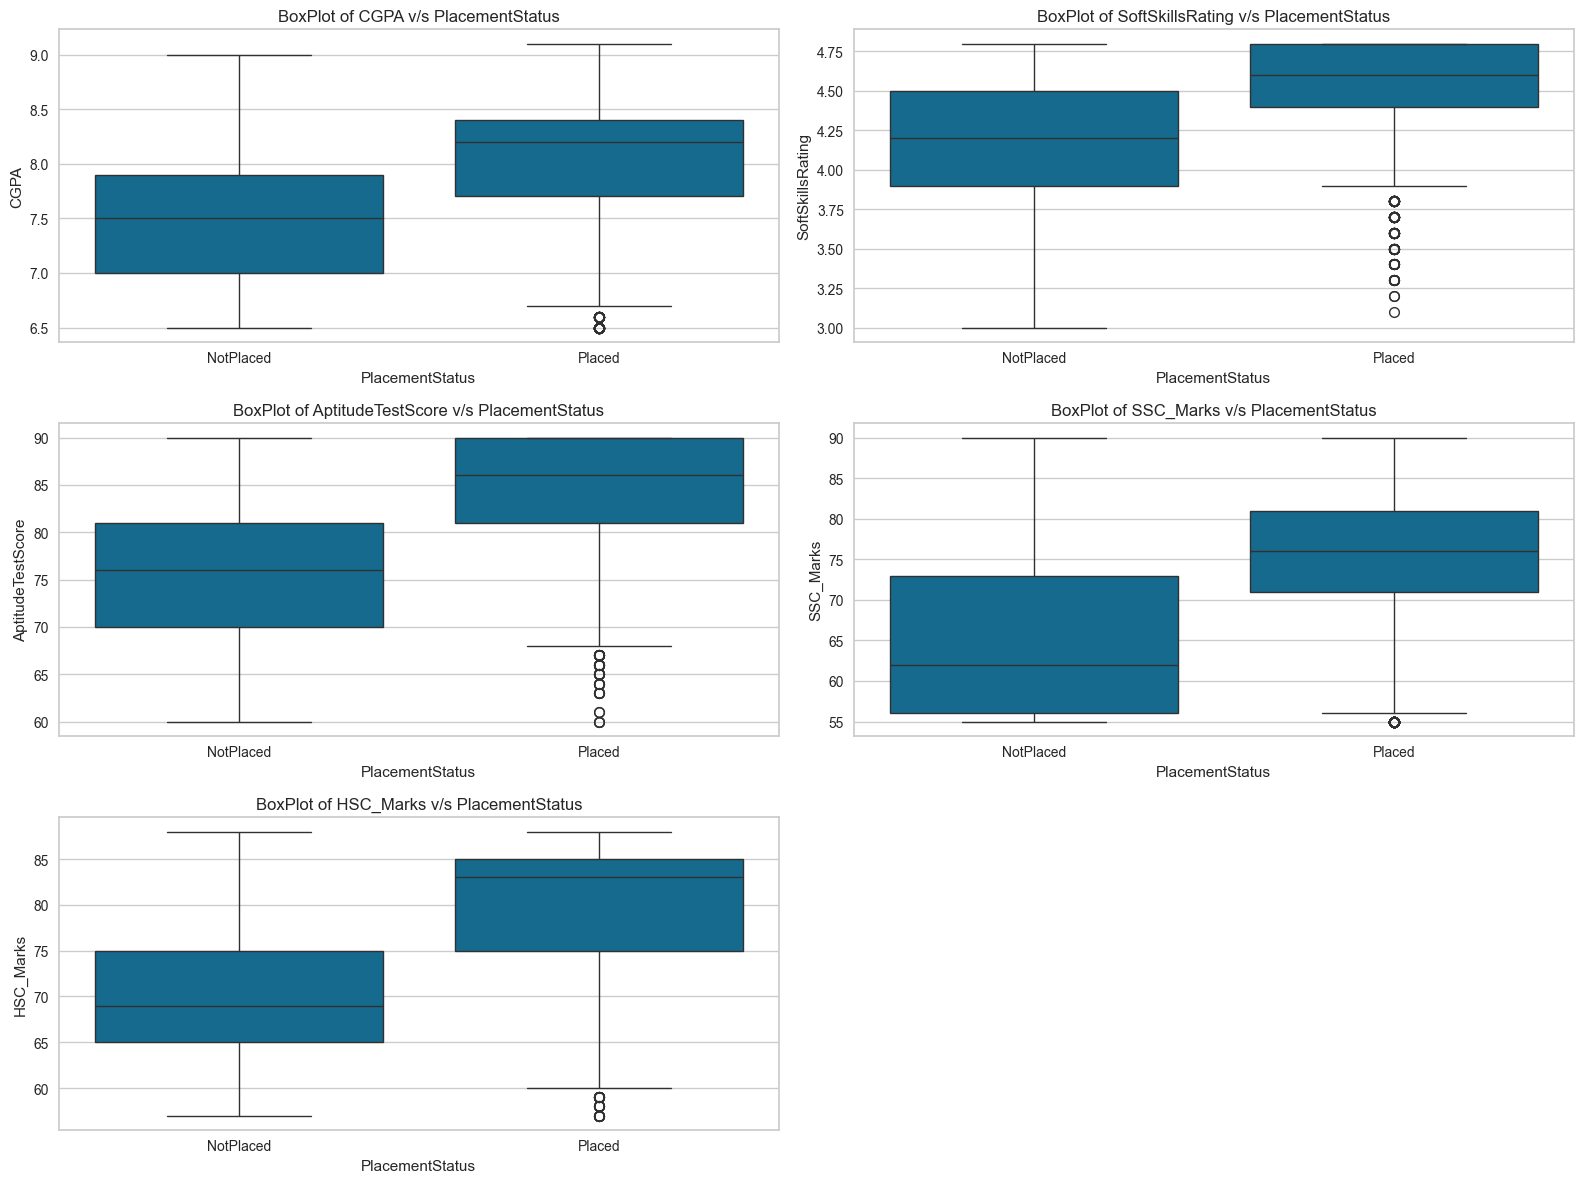

In [218]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(y=df[num_columns[index]], data=df, ax=axis[row, col],x=df["PlacementStatus"])
        axis[row, col].set_title(f'BoxPlot of {num_columns[index]} v/s PlacementStatus')
        index += 1

# Remove the plot in the 2nd row, 1st column
fig.delaxes(axis[2, 1])

# Plot for 'HSC_Marks'
sns.boxplot(y=df['HSC_Marks'], data=df, ax=axis[2, 0], x=df["PlacementStatus"])
axis[2, 0].set_title('BoxPlot of HSC_Marks v/s PlacementStatus')

plt.tight_layout()
plt.show()


### Multi-variate Analysis

<Axes: >

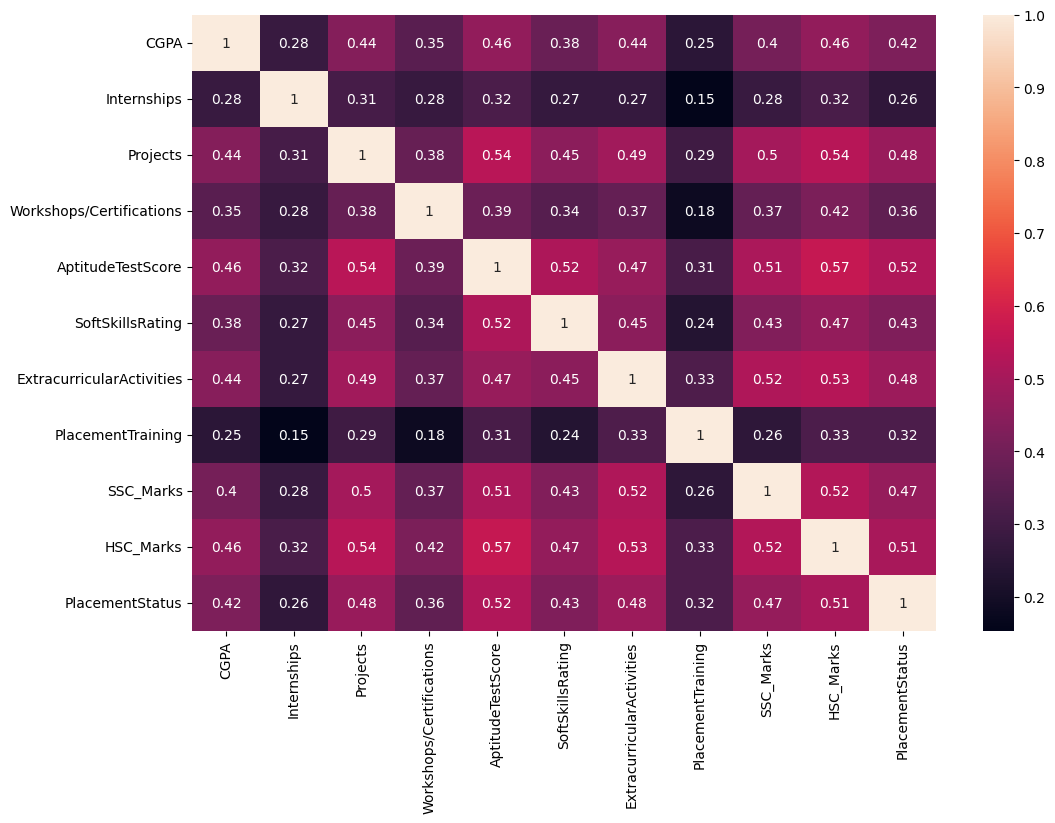

In [96]:
df_corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True)

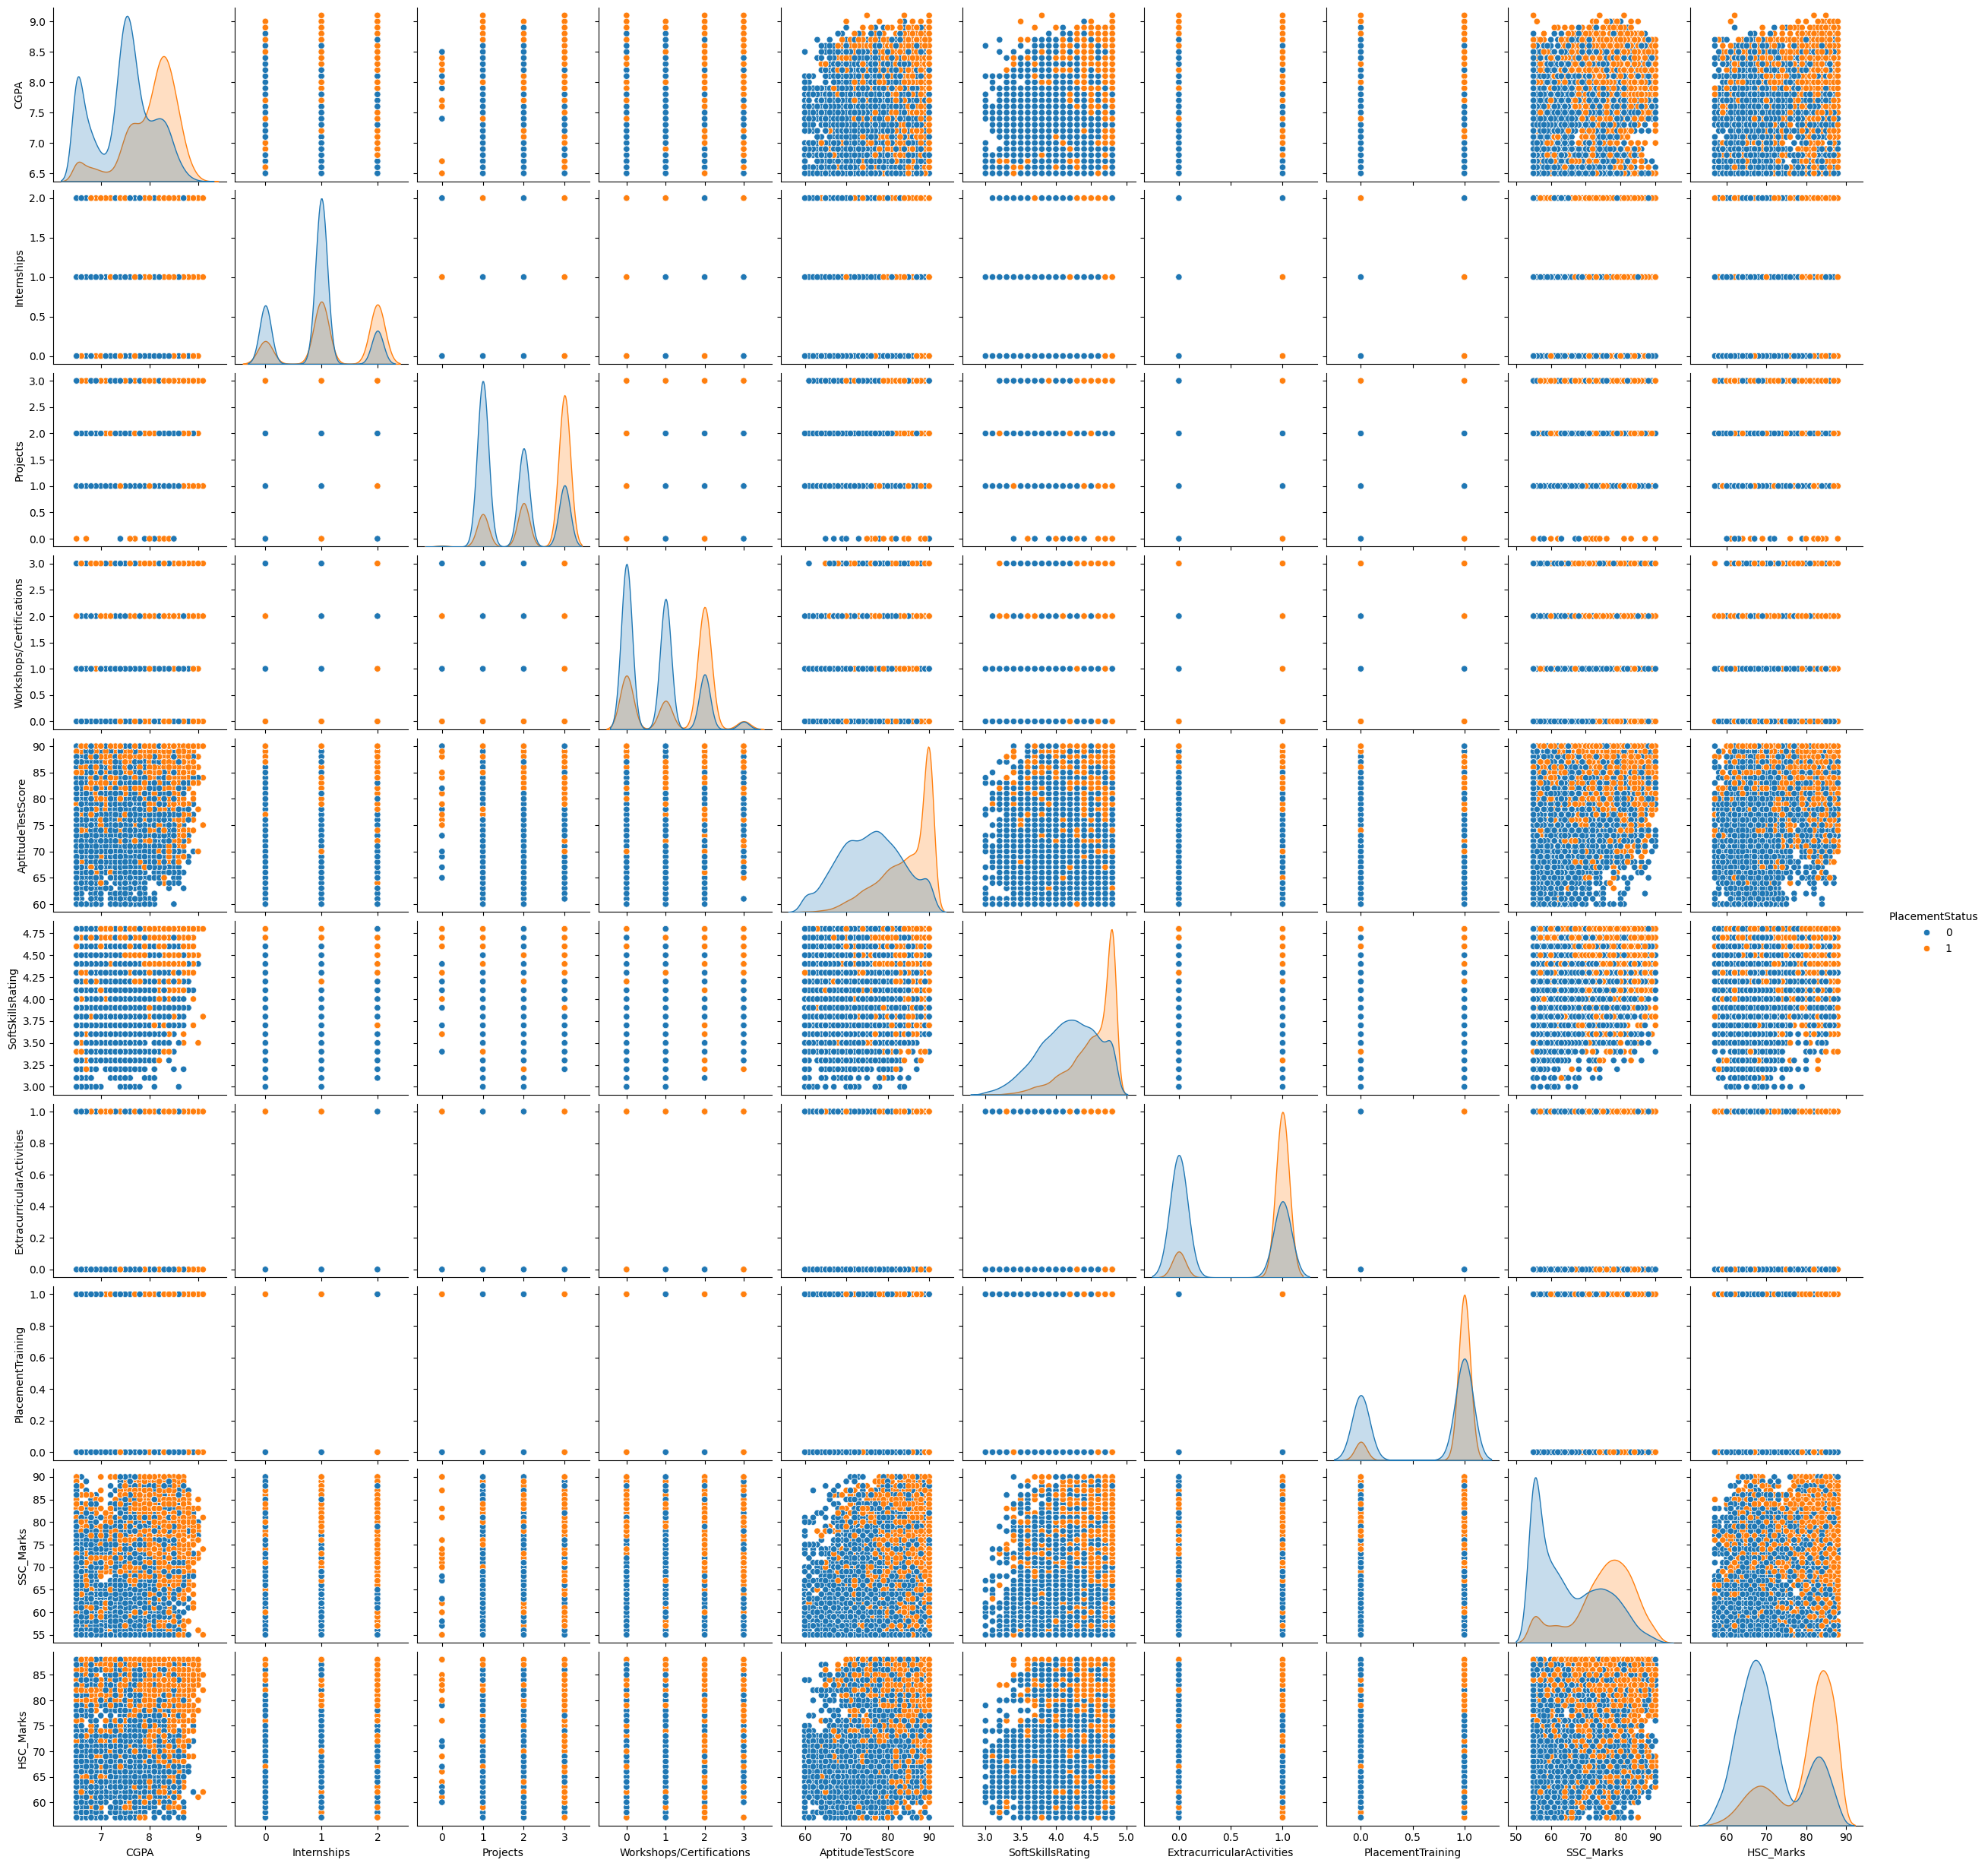

In [60]:
sns.pairplot(df,hue='PlacementStatus')

## Data Preprocessing

In [124]:
# Dropping Student as it is not needed
df=df.drop(columns='StudentID')
df.head(2)

CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  \
0   7.5            1         1                         1                 65   
1   8.9            0         3                         2                 90   

   SoftSkillsRating ExtracurricularActivities PlacementTraining  SSC_Marks  \
0               4.4                        No                No         61   
1               4.0                       Yes               Yes         78   

   HSC_Marks PlacementStatus  
0         79       NotPlaced  
1         82          Placed

In [125]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
object_cols = df.select_dtypes(include=['object']).columns
for column in object_cols:
    df[column] = labelencoder.fit_transform(df[column])
    df[column]=labelencoder.fit_transform(df[column])

df.head(2)

CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  \
0   7.5            1         1                         1                 65   
1   8.9            0         3                         2                 90   

   SoftSkillsRating  ExtracurricularActivities  PlacementTraining  SSC_Marks  \
0               4.4                          0                  0         61   
1               4.0                          1                  1         78   

   HSC_Marks  PlacementStatus  
0         79                0  
1         82                1

In [126]:
# Normalization of numerical columns
df_min = df.copy()
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_min[num_columns] = scaler.fit_transform(df_min[num_columns])

# Display the normalized DataFrame
df_min.head(2)


CGPA  Internships  Projects  Workshops/Certifications  \
0  0.384615            1         1                         1   
1  0.923077            0         3                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0           0.166667          0.777778                          0   
1           1.000000          0.555556                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0   0.171429   0.709677                0  
1                  1   0.657143   0.806452                1

### Models without Normalization

In [176]:
# here X is the all the Data except the PlacementStatus and from which we have to predict our result
features=df.drop(columns='PlacementStatus')
# y is the class label which we have to predict
predictionClass=df.PlacementStatus

# Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(features,predictionClass,test_size=0.25,random_state=0)

Accuracy Score: 0.792
              precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1471
      Placed       0.74      0.77      0.75      1029

    accuracy                           0.79      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.79      0.79      0.79      2500



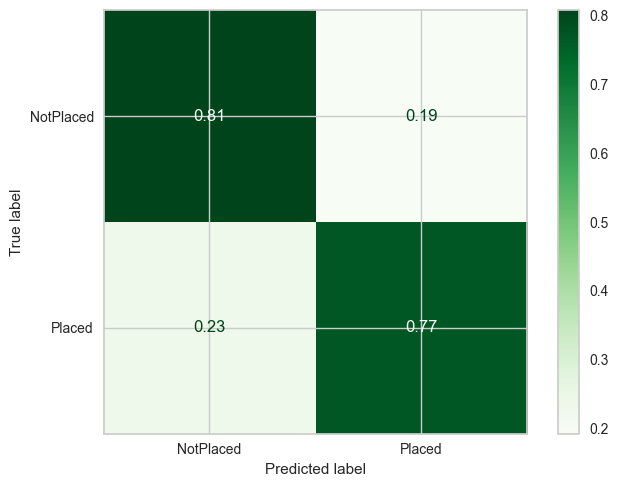

In [182]:
# Initialize Logistic Regression with specific parameters
lr = LogisticRegression(max_iter=50000, penalty="l2")

# Train the logistic regression model using training data
lr.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = lr.predict(X_test)

# Calculate and print the accuracy score of the model
# logAccuracy = accuracy_score(prediction, y_test)
print("Accuracy Score:", accuracy_score(prediction, y_test))

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Greens')

Accuracy Score: 0.7928
              precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1471
      Placed       0.74      0.77      0.75      1029

    accuracy                           0.79      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.79      0.79      0.79      2500



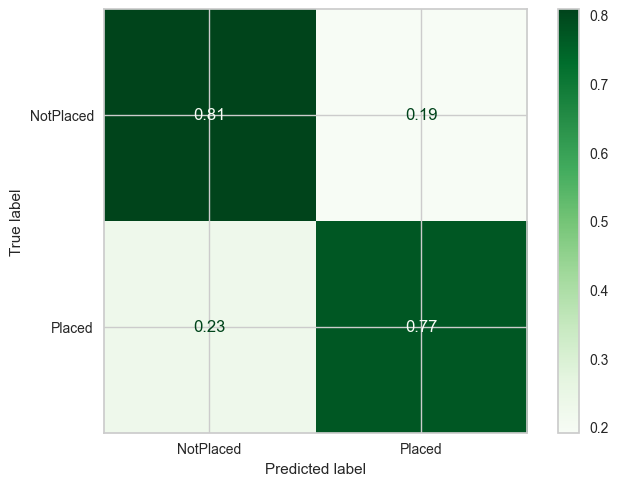

In [190]:
# Initialize Logistic Regression with specific parameters
lr = LogisticRegression(max_iter=50000, penalty=None)

# Train the logistic regression model using training data
lr.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = lr.predict(X_test)

# Calculate and print the accuracy score of the model
logWT = accuracy_score(prediction, y_test)
print("Accuracy Score:",logAccuracyWTN)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Greens')


Accuracy Score: 0.7244
              precision    recall  f1-score   support

   NotPlaced       0.77      0.75      0.76      1471
      Placed       0.66      0.68      0.67      1029

    accuracy                           0.72      2500
   macro avg       0.72      0.72      0.72      2500
weighted avg       0.73      0.72      0.73      2500



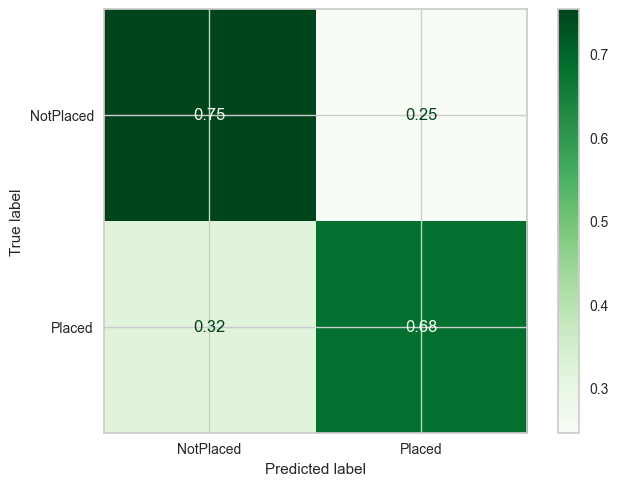

In [202]:
# Initialize Decision Tree Classifier with specific parameters
dt = DecisionTreeClassifier(criterion='entropy', splitter='best')

# Train the decision tree model using training data
dt.fit(X_train, y_train)

# Make predictions on the test set using the trained decision tree model
prediction = dt.predict(X_test)

# Calculate and print the accuracy score of the model
decWT = accuracy_score(prediction, y_test)
print("Accuracy Score:",decWT)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Greens')

Accuracy Score: 0.778
              precision    recall  f1-score   support

   NotPlaced       0.81      0.82      0.81      1471
      Placed       0.73      0.72      0.73      1029

    accuracy                           0.78      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.78      0.78      0.78      2500



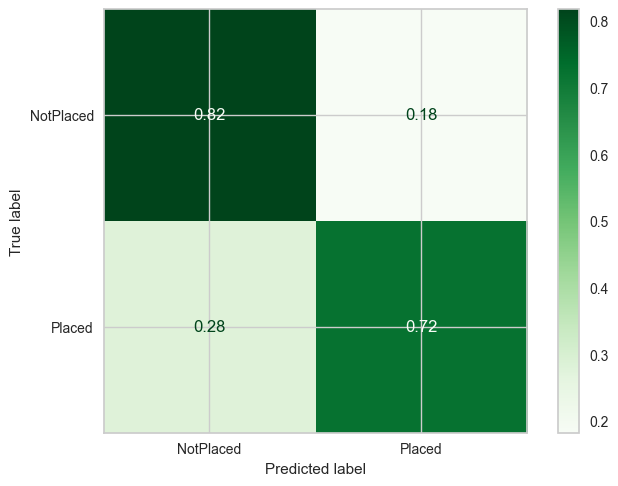

In [191]:

# Initialize K-Nearest Neighbors Classifier with specific parameters
knn = KNeighborsClassifier(n_neighbors=100, weights='distance')

# Train the KNN model using training data
knn.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = knn.predict(X_test)

# Calculate and print the accuracy score of the model
knnWT = accuracy_score(prediction, y_test)
print("Accuracy Score:",knnWT)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Greens')

Accuracy Score: 0.7836
              precision    recall  f1-score   support

   NotPlaced       0.81      0.83      0.82      1471
      Placed       0.75      0.72      0.73      1029

    accuracy                           0.78      2500
   macro avg       0.78      0.77      0.78      2500
weighted avg       0.78      0.78      0.78      2500



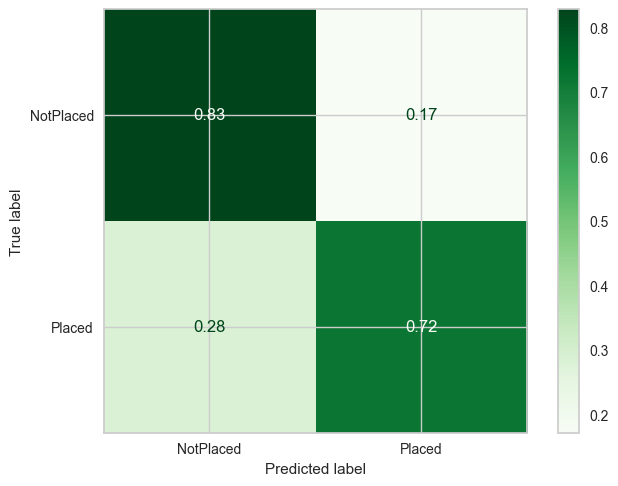

In [192]:
# Initialize Random Forest Classifier with specific parameters
rfc = RandomForestClassifier(criterion='entropy')

# Train the Random Forest model using training data
rfc.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = rfc.predict(X_test)

# Calculate and print the accuracy score of the model
ranWN = accuracy_score(prediction, y_test)
print("Accuracy Score:",ranWN)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Greens')

## Applying Models with Normalizations

In [193]:
# here X is the all the Data except the PlacementStatus and from which we have to predict our result
features=df_min.drop(columns='PlacementStatus')
# y is the class label which we have to predict
predictionClass=df.PlacementStatus

In [194]:
# Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(features,predictionClass,test_size=0.25,random_state=0)

## Logistics Regression

Accuracy Score: 0.7924
              precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1471
      Placed       0.74      0.77      0.75      1029

    accuracy                           0.79      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.79      0.79      0.79      2500



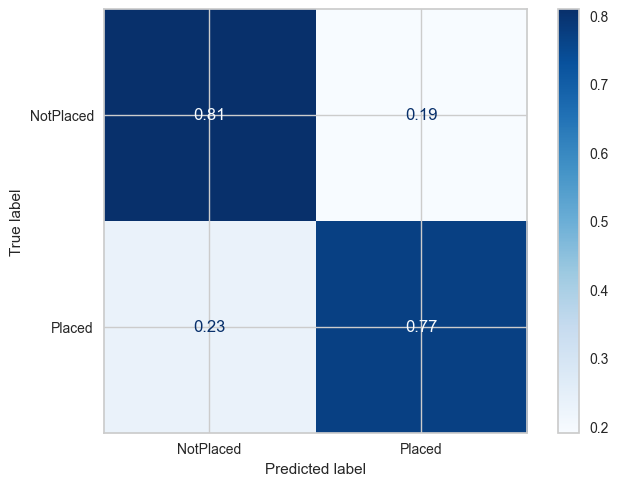

In [195]:
# Initialize Logistic Regression with specific parameters
lr = LogisticRegression(max_iter=50000, penalty=None)

# Train the logistic regression model using training data
lr.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = lr.predict(X_test)

# Calculate and print the accuracy score of the model
logAccuracy = accuracy_score(prediction, y_test)
print("Accuracy Score:",logAccuracy)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Blues')

Accuracy Score: 0.7924
              precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1471
      Placed       0.74      0.77      0.75      1029

    accuracy                           0.79      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.79      0.79      0.79      2500



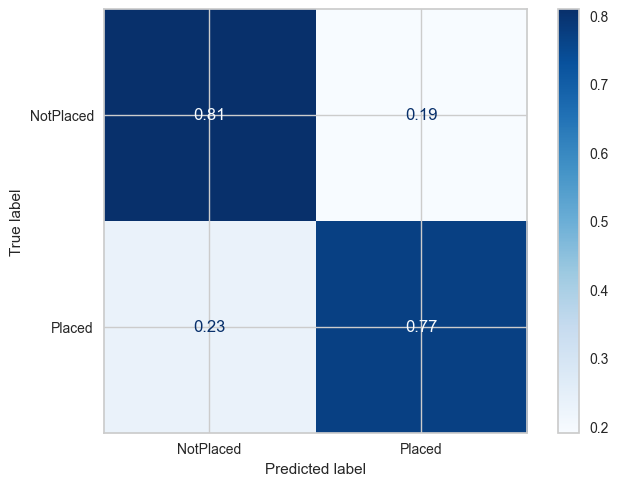

In [196]:
# Use L2 regularization (Ridge)
lr_l2 = LogisticRegression(penalty='l1',solver='liblinear', max_iter=50000)

# Train the logistic regression model using training data
lr.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = lr.predict(X_test)

# Calculate and print the accuracy score of the model
logAccuracy = accuracy_score(prediction, y_test)
print("Accuracy Score:",logAccuracy)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Blues')

Accuracy Score: 0.7924
              precision    recall  f1-score   support

   NotPlaced       0.83      0.81      0.82      1471
      Placed       0.74      0.77      0.75      1029

    accuracy                           0.79      2500
   macro avg       0.79      0.79      0.79      2500
weighted avg       0.79      0.79      0.79      2500



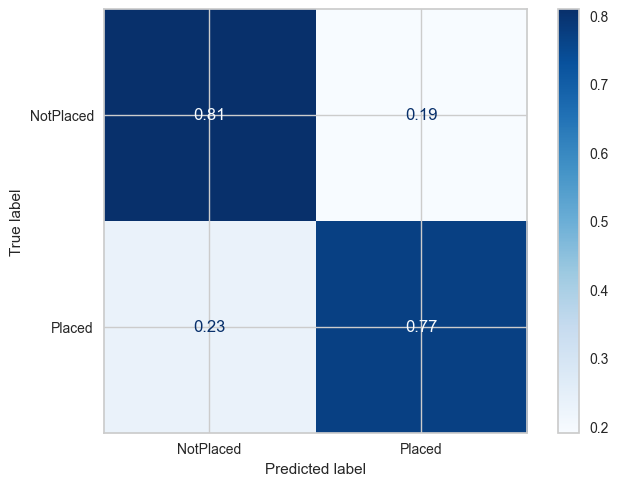

In [210]:
# Use L2 regularization (Ridge)
lr_l2 = LogisticRegression(penalty='l2', max_iter=50000)

# Train the logistic regression model using training data
lr.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = lr.predict(X_test)

# Calculate and print the accuracy score of the model
logAccuracy = accuracy_score(prediction, y_test)
print("Accuracy Score:",logAccuracy)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Blues')

## Decision Tree

Accuracy Score: 0.7244
              precision    recall  f1-score   support

   NotPlaced       0.77      0.76      0.76      1471
      Placed       0.66      0.67      0.67      1029

    accuracy                           0.72      2500
   macro avg       0.72      0.72      0.72      2500
weighted avg       0.73      0.72      0.72      2500



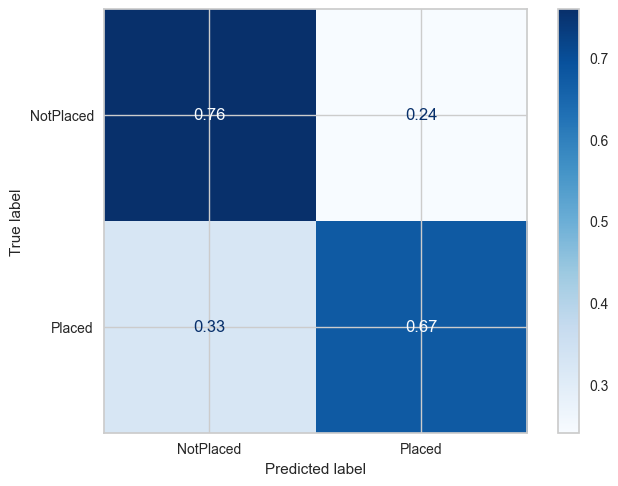

In [198]:
# Initialize Decision Tree Classifier with specific parameters
dt = DecisionTreeClassifier(criterion='entropy', splitter='best')

# Train the decision tree model using training data
dt.fit(X_train, y_train)

# Make predictions on the test set using the trained decision tree model
prediction = dt.predict(X_test)

# Calculate and print the accuracy score of the model
decTreeAccuracy = accuracy_score(prediction, y_test)
print("Accuracy Score:",decTreeAccuracy)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Blues')

## Random Forest

Accuracy Score: 0.7808
              precision    recall  f1-score   support

   NotPlaced       0.81      0.82      0.82      1471
      Placed       0.74      0.72      0.73      1029

    accuracy                           0.78      2500
   macro avg       0.77      0.77      0.77      2500
weighted avg       0.78      0.78      0.78      2500



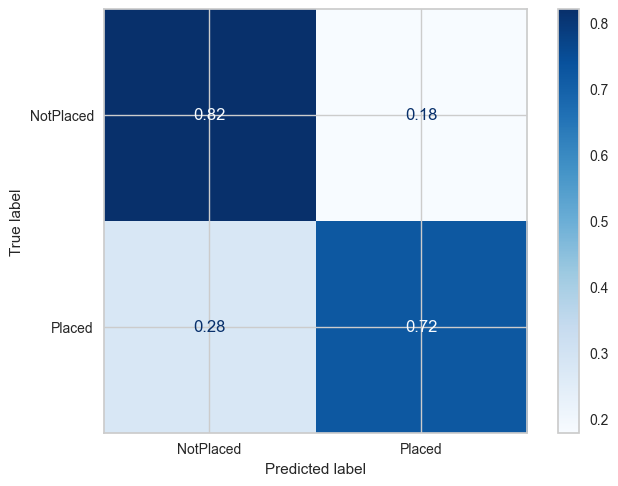

In [199]:
# Initialize Random Forest Classifier with specific parameters
rfc = RandomForestClassifier(criterion='entropy')

# Train the Random Forest model using training data
rfc.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = rfc.predict(X_test)

# Calculate and print the accuracy score of the model
ranForestAccuracy = accuracy_score(prediction, y_test)
print("Accuracy Score:",ranForestAccuracy)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Blues')

## KNN

Accuracy Score: 0.7864
              precision    recall  f1-score   support

   NotPlaced       0.83      0.80      0.81      1471
      Placed       0.73      0.77      0.75      1029

    accuracy                           0.79      2500
   macro avg       0.78      0.78      0.78      2500
weighted avg       0.79      0.79      0.79      2500



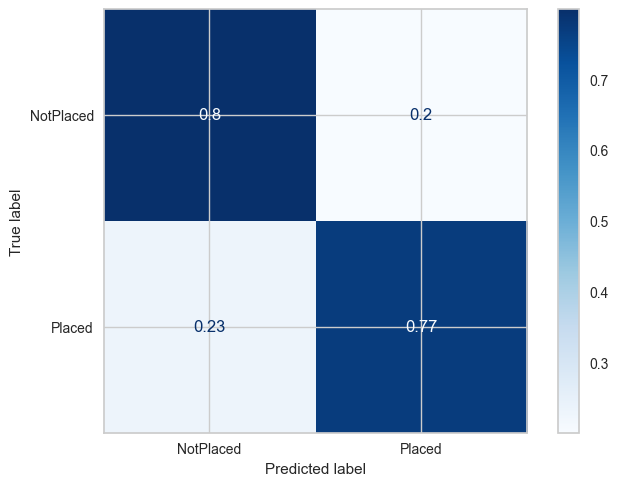

In [200]:
# Initialize K-Nearest Neighbors Classifier with specific parameters
knn = KNeighborsClassifier(n_neighbors=100, weights='distance')

# Train the KNN model using training data
knn.fit(X_train, y_train)

# Make predictions on the test set using the trained model
prediction = knn.predict(X_test)

# Calculate and print the accuracy score of the model
knnAccuracy = accuracy_score(prediction, y_test)
print("Accuracy Score:",knnAccuracy)

# Define labels for the classification report
target_names = ['NotPlaced', 'Placed']

# Generate and print the classification report (precision, recall, f1-score, support)
print(classification_report(y_test, prediction, target_names=target_names))

# Create a normalized confusion matrix based on the test predictions
# and plot it using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction, normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Blues')

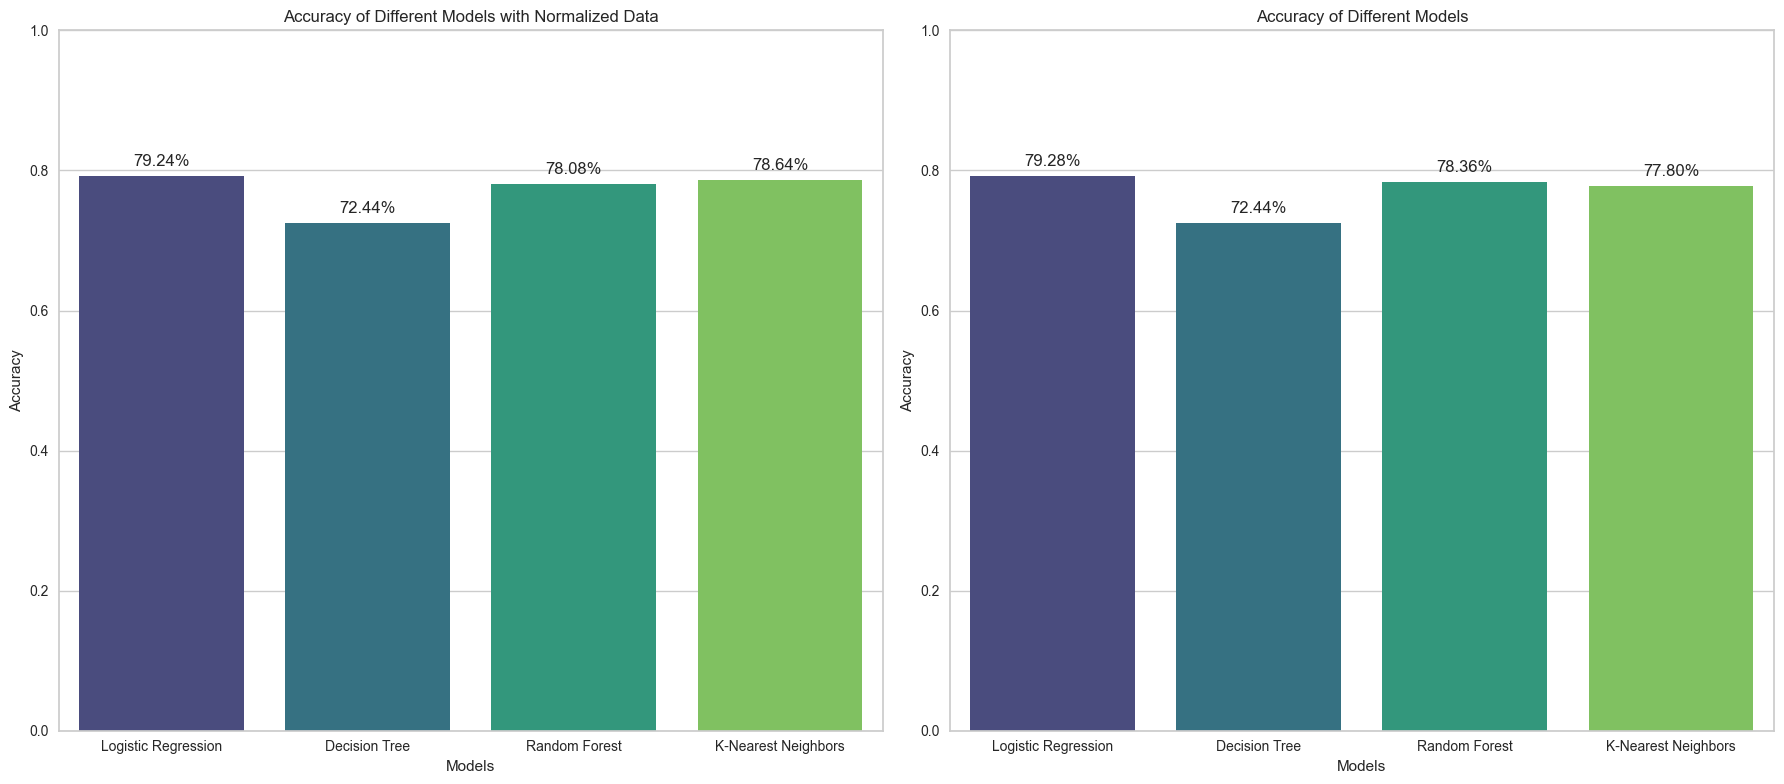

In [205]:

# Data for the first plot (with normalized data)
models = ["Logistic Regression", "Decision Tree", "Random Forest", "K-Nearest Neighbors"]
accuracy = [logAccuracy, decTreeAccuracy, ranForestAccuracy, knnAccuracy]

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, and index 1 (left plot)
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models with Normalized Data')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1

# Add percentages above the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f'{acc:.2%}', ha='center', va='bottom')

# Data for the second plot (without normalization)
accuracy = [logWT, decWT, ranWN, knnWT]

plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, and index 2 (right plot)
sns.barplot(x=models, y=accuracy, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1

# Add percentages above the bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f'{acc:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Pycaret

In [147]:
from pycaret.classification import *
pycrt = setup(df_min,target='PlacementStatus', session_id=123)

In [148]:
# compare baseline models
best = compare_models()

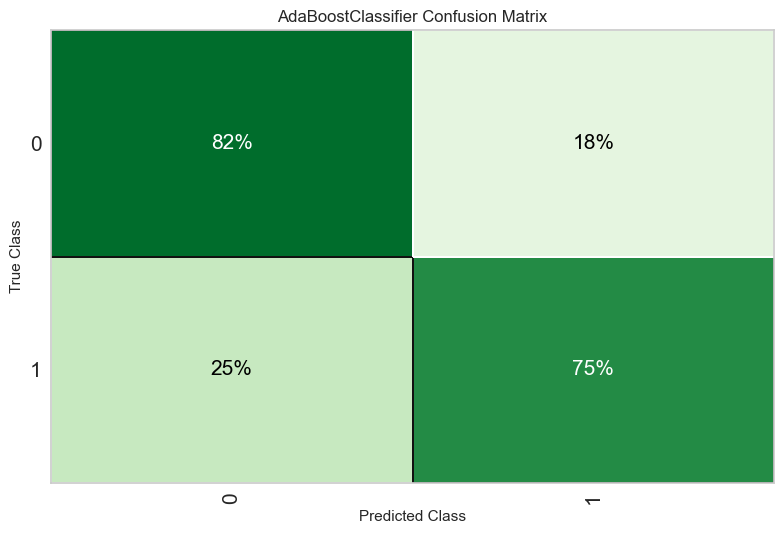

In [154]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

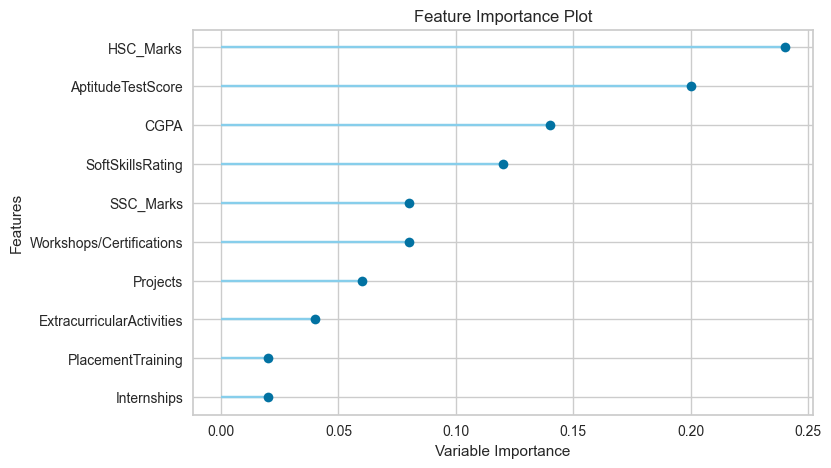

In [155]:
# plot feature importance
plot_model(best, plot = 'feature')

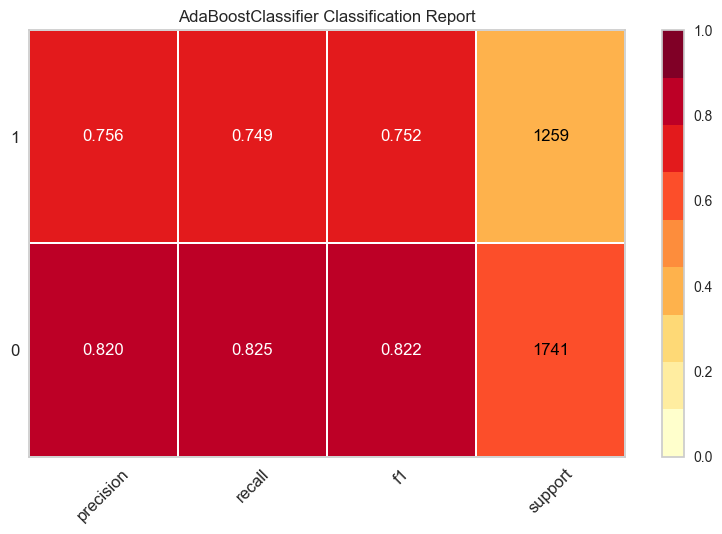

In [156]:
# plot class report
plot_model(best, plot = 'class_report')

In [160]:
#Defining a function to predict on the given student data
def predictForStudents(students, model):
  students = students.drop(columns='StudentID')

  students['ExtracurricularActivities'] = students['ExtracurricularActivities'].map({'Yes' : 1, 'No' : 0})
  students['PlacementTraining'] = students['PlacementTraining'].map({'Yes' : 1, 'No' : 0})

  prediction = model.predict(students)
  for index, d in enumerate(prediction):
    result = 'No' if d==0 else 'Yes'
    print('Student',(index+1),':',result)

In [161]:
#Defining students data which are to be predicted
data = [
    {'StudentID' : 2,
     'CGPA' : 8.9,
      'Internships' : 0,
      'Projects' : 3,
      'Workshops/Certifications' : 2,
      'AptitudeTestScore' : 90,
      'SoftSkillsRating' : 4.0,
      'ExtracurricularActivities' : 'Yes',
      'PlacementTraining' : 'Yes',
      'SSC_Marks' : 78,
      'HSC_Marks' : 82},
    {'StudentID' : 84,
     'CGPA' : 9.0,
      'Internships' : 2,
      'Projects' : 3,
      'Workshops/Certifications' : 1,
      'AptitudeTestScore' : 25,
      'SoftSkillsRating' : 8.0,
      'ExtracurricularActivities' : 'Yes',
      'PlacementTraining' : 'Yes',
      'SSC_Marks' : 78,
      'HSC_Marks' : 69},
]

data = pd.DataFrame(data)
data

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          2   8.9            0         3                         2   
1         84   9.0            2         3                         1   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 90               4.0                       Yes   
1                 25               8.0                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks  
0               Yes         78         82  
1               Yes         78         69

In [162]:
#Getting prediction using Logistic Regression
predictForStudents(data, lr)

Student 1 : Yes
Student 2 : Yes


In [172]:
#Getting prediction using Decision Tree Classifier
predictForStudents(data, dt)

Student 1 : Yes
Student 2 : Yes


In [173]:
#Getting prediction using KNeighbour
predictForStudents(data, knn)

Student 1 : Yes
Student 2 : Yes


In [163]:
#Getting prediction using Random Forest Classifier
predictForStudents(data, rfc)

Student 1 : Yes
Student 2 : Yes
